In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [31]:
df_train = pd.read_csv('Data/iot_device_train.csv')
df_test = pd.read_csv('Data/iot_device_test.csv')
#print(df_test.head())


frames = [df_train, df_test]
df = pd.concat(frames)
#print(result.head())

In [32]:
df.isnull().sum()

ack                         0
ack_A                       0
ack_B                       0
bytes                       0
bytes_A                     0
                           ..
suffix_is_googleapis.com    0
suffix_is_net               0
suffix_is_org               0
suffix_is_unresolved        0
device_category             0
Length: 298, dtype: int64

In [33]:
df['device_category'].value_counts()

device_category
security_camera    200
TV                 200
smoke_detector     200
thermostat         200
watch              200
baby_monitor       200
motion_sensor      200
lights             200
socket             200
water_sensor       100
Name: count, dtype: int64

In [34]:
df.shape

(1900, 298)

In [35]:
X = df.drop(columns='device_category', axis=1)
Y = df['device_category']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
extra_tree = ExtraTreeClassifier(random_state=0)
cls = BaggingClassifier(extra_tree, random_state=0).fit(X_train, y_train)
predictions = cls.predict(X_test)
cls.score(X_test, y_test)

0.8463157894736842

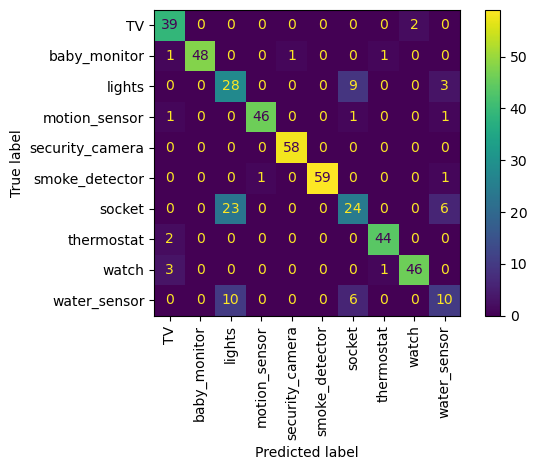

In [37]:
ConfusionMatrixDisplay.from_estimator(cls, X_test, y_test, display_labels=cls.classes_, xticks_rotation="vertical")
plt.tight_layout()
plt.show()

In [49]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
"""
precision_score(y_test, y_pred, average='micro') will return the total ratio of tp/(tp + fp)
"""
precision = precision_score(y_test, predictions, average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.846316
Precision: 0.846316
Recall: 0.846316
F1 score: 0.846316


In [50]:
df.columns.tolist()

['ack',
 'ack_A',
 'ack_B',
 'bytes',
 'bytes_A',
 'bytes_A_B_ratio',
 'bytes_B',
 'ds_field_A',
 'ds_field_B',
 'duration',
 'http_GET',
 'http_POST',
 'http_bytes_avg',
 'http_bytes_entropy',
 'http_bytes_firstQ',
 'http_bytes_max',
 'http_bytes_median',
 'http_bytes_min',
 'http_bytes_stdev',
 'http_bytes_sum',
 'http_bytes_thirdQ',
 'http_bytes_var',
 'http_cookie_count',
 'http_cookie_values_avg',
 'http_cookie_values_entropy',
 'http_cookie_values_firstQ',
 'http_cookie_values_max',
 'http_cookie_values_median',
 'http_cookie_values_min',
 'http_cookie_values_stdev',
 'http_cookie_values_sum',
 'http_cookie_values_thirdQ',
 'http_cookie_values_var',
 'http_count_host',
 'http_count_req_content_type',
 'http_count_resp_code',
 'http_count_resp_content_type',
 'http_count_transactions',
 'http_count_user_agents',
 'http_dom_host_alexaRank',
 'http_dom_resp_code',
 'http_has_location',
 'http_has_referrer',
 'http_has_req_content_type',
 'http_has_resp_content_type',
 'http_has_user

In [ ]:
#TODO make classifier dropping the columns that are not accesible from outside the network.